In [38]:
!pip show wordcloud

Name: wordcloud
Version: 1.7.0
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: Andreas Mueller
Author-email: t3kcit+wordcloud@gmail.com
License: MIT
Location: c:\python37\lib\site-packages
Requires: pillow, numpy, matplotlib
Required-by: 


In [17]:
!pip show krwordrank

Name: krwordrank
Version: 1.0.3
Summary: KR-WordRank: Korean Unsupervised Word/Keyword Extractor
Home-page: https://github.com/lovit/KR-WordRank
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: c:\python37\lib\site-packages
Requires: scikit-learn, numpy, scipy
Required-by: 


In [16]:
!pip install krwordrank

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install pymysql

  Using cached PyMySQL-0.10.0-py2.py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
pip show pymysql

Name: PyMySQL
Version: 0.10.0
Summary: Pure Python MySQL Driver
Home-page: https://github.com/PyMySQL/PyMySQL/
Author: yutaka.matsubara
Author-email: yutaka.matsubara@gmail.com
License: "MIT"
Location: c:\python37\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [83]:
!pip install palettable

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [7]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 3, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(noun_list, beta, max_iter)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 0


ValueError: ('The graph should consist of at least two nodes\n', 'The node size of inserted graph is 0')

In [6]:
from konlpy.tag import Kkma

def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun

kkma = Kkma()
# kkma.nouns('연기는 손색이 없으나 스토리가 조금 빈약하지 않나 생각합니다 뽈티')
noun_list = []
for x in texts:
    noun_list += kkma.nouns(x)

noun_list = [a for a in noun_list if len(a) > 1]    
noun_list

KeyboardInterrupt: 

In [69]:
from wordcloud import get_single_color_func
from wordcloud import WordCloud

wordcloud = WordCloud()
# wordcloud = wordcloud.generate_from_text(texts)
wordcloud = wordcloud.generate_from_frequencies(keywords)
class GroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [105]:
import pymysql

db = pymysql.connect(host='localhost', port=3306, db='project_db', user='python', passwd='python', charset='utf8')
# 8번: 보헤미안랩소디 34번: 해리포터 
try:
    #select, update
    with db.cursor() as cursor:
        cursor.execute('select comment from movieapp_comment where movie_id=5')
        result_list = cursor.fetchall() # cursor()의 값을 가져온다.
        print(type(result_list), len(result_list))
        for row in result_list:
            print(row)
finally:
    db.close()

<class 'tuple'> 0


# 워드클라우드 전체 코드

In [41]:
from krwordrank.hangle import normalize

texts = [row[0] for row in result_list]
# 영어, 한글만
texts = [normalize(text, english=True, number=True) for text in texts]
print(texts)

['이순재 배우님 사랑합니다', '최고로 잘해줘도 할배는 안돼나 대사 듣고 오열할뻔 이순재 배우님도 아역들도 연기 대박입니다 잔잔한 감동과 슬픔이 있었네요', '이순재 배우님 항상 그자리에 굳건히 지켜주세요', '노장이 연기 잘하는건 당연한게 아니라 철저한 자기 관리 이다', '이순재 할어버지의 품은 정말 따듯할 것 같다', '개인적으로 곤지암보다 돈이 훨씬 아깝지않다', '관람객 평점 10점 만점 알바인가 해서 봤는데 진짜 10점 짜리였다', '진짜 너무 먹먹했어요 엄청 울고나온 이순재 선생님 연기 보는것만으로도 맘이 저렸던거 같네요', '안산시 길거리에서 덕구가 엄마찾을때 너무 슬프더라구요감동 넘치는 영화에요 강추합니다', '오늘 개봉첫날인데 아침에 조조로 언니랑 보고왔네욤 이순재 선생님이 왜 노개런티로 작품을 하셨는지 영화를 보고 알았어욤 너무너무 잘보고왔습니다 추천합니다', '시간가는지모르고 울면서봤습니다 감동적이고 좋은스토리 이순재할아버지 노개런티로 출연하셨다는데 좋은영화 덕분에 잘봤습니다', '이집잘하네대박입니다', '안울래야 안 울 수가 없다 결말도 마냥 슬프지만 않아서 넘 만족', '뻔하다면 뻔하지만 보면 감동적이고 따뜻한 영화', '담백하면서 감동적인 영화 억지로 쥐어짜지않는다', '우리의 삶은 무엇으로 빛이 되는가', '이런 눈물은 아무리 흘려도 아깝디 않다', '영화를 보고 나왔는데 계속 눈물이 난다 이순재님의 연기에 묵묵한 오열이 느껴진다', '너무 감동적이고 재밋는 영화 이순재', '진심으로 울게되는 영화 배우들의 연기가 너무 좋다 지칠정도로 이 영화는 나를 울렸다', '평점 처음 써보는데 너무 감동적이네요 눈물콧물 다 쏟았어요 코에 휴지꼽고 봤네요', '예교편만 봐도 눈물 날것 같다', '꼭 보고싶어서 찾았더니 이거 원 조조하나 심야하나 달랑 두번 상영하네요 이런영화는 상영관도 몇 개 받지도 못하고 무슨내용인지도 모를 영화가 상영관 대부분을 점유하는 현실 멀티플렉스에 쿼터를 둬야하지않을까', '한국영화 이정도만되도 무조건 극장간다', 

In [121]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 3, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 8, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 8

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 433
done = 8
      영화:	12.4842
      너무:	4.1798
      정말:	3.9467
      이런:	2.8126
     최고의:	2.3744
      이게:	2.3699
    아카데미:	2.3320
   2019년:	2.2611
      연기:	2.1967
      알리:	1.8791
    봤습니다:	1.8018
     이렇게:	1.7971
      있는:	1.7747
      많이:	1.7710
      음악:	1.7666
      많은:	1.7487
      작품:	1.5096
      있다:	1.4507
      따뜻:	1.3842
      흑인:	1.3651
    마허샬라:	1.3086
     편견을:	1.2999
      강추:	1.2731
     아니라:	1.2066
     봤는데:	1.1961
      모두:	1.1908
     있어서:	1.1551
      상영:	1.1409
     스토리:	1.1204
      좋은:	1.1050


In [122]:
exclude_set = {'영화', '너무', '정말', '진짜', '그리고', '가장', '제일', '이런', '하는', '엄청', '조금', '완전', '계속', '할때', '있었던', '어떤', '이런', '않고', '보다', '그래도', '봤는데', '보는', '어느', '하고', '하지만', '이렇게', '있다'}
key_set = set(keywords.keys())

for w in exclude_set & key_set:
    keywords.pop(w)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

     최고의:	2.3744
      이게:	2.3699
    아카데미:	2.3320
   2019년:	2.2611
      연기:	2.1967
      알리:	1.8791
    봤습니다:	1.8018
      있는:	1.7747
      많이:	1.7710
      음악:	1.7666
      많은:	1.7487
      작품:	1.5096
      따뜻:	1.3842
      흑인:	1.3651
    마허샬라:	1.3086
     편견을:	1.2999
      강추:	1.2731
     아니라:	1.2066
      모두:	1.1908
     있어서:	1.1551
      상영:	1.1409
     스토리:	1.1204
      좋은:	1.1050
      대한:	1.0863
      사람:	1.0712
      셜리:	1.0697
      잔잔:	1.0659
      배우:	1.0607
      보세:	1.0577
      소재:	1.0327


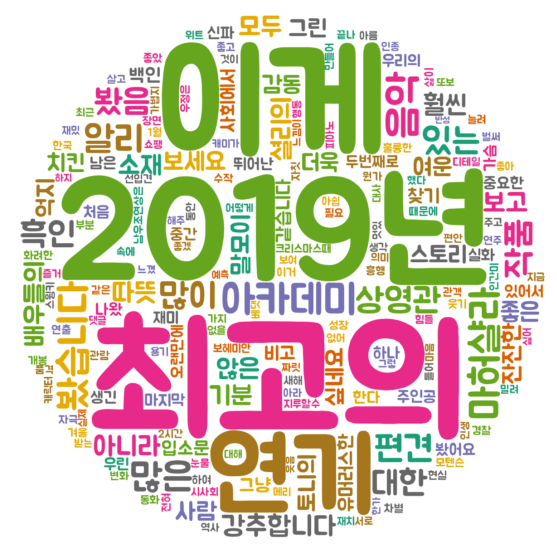

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from palettable.colorbrewer.qualitative import Dark2_8
import random
from wordcloud import get_single_color_func
from wordcloud import WordCloud

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

icon = Image.open("C:/mypython/circle.png")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# 야놀자야체Bold
# SpoqaHanSansBold
# BMHANNA_11yrs_ttf
# BMDOHYEON_ttf
# BMJUA_ttf
# 12롯데마트행복Bold
# TmonMonsori.ttf
font_path = "C:/mypython/BMJUA_ttf.ttf"

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = mask
)
               
# generate word cloud
# wc.generate_from_text(message)
# wc.recolor(color_func=color_func, random_state=3)

wordcloud = wordcloud.generate_from_frequencies(keywords)
wordcloud.recolor(color_func=color_func, random_state=3)
# grouped_color_func = GroupedColorFunc(color_to_words, default_color)
# wordcloud.recolor(color_func=grouped_color_func)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("C:/mypython/recommend_movie/django_movie/movieapp/static/movieapp/img/wordcloud/1.png")
# plt.savefig('C:/mypython/recommend_movie/django_movie/movieapp/static/movieapp/img/wordcloud/1.png')

In [194]:
import pymysql

db = pymysql.connect(host='localhost', port=3306, db='project_db', user='python', passwd='python', charset='utf8')
query = 'select distinct movie_id, count(id) from movieapp_comment group by movie_id'

try:
    #select, update
    with db.cursor() as cursor:
        cursor.execute(query)
        movie_id_list = cursor.fetchall() # cursor()의 값을 가져온다.
finally:
    db.close()
        
movie_id_list = [m[0] for m in movie_id_list[447:]]
print(len(movie_id_list))
movie_id_list

740


[447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614

scan vocabs ... 
num vocabs = 527
done = 6
447번 완료
scan vocabs ... 
num vocabs = 671
done = 6
448번 완료
scan vocabs ... 
num vocabs = 381
done = 6
449번 완료
scan vocabs ... 
num vocabs = 770
done = 6
450번 완료
scan vocabs ... 
num vocabs = 554
done = 6
451번 완료
scan vocabs ... 
num vocabs = 446
done = 6
452번 완료
scan vocabs ... 
num vocabs = 589
done = 6
453번 완료
scan vocabs ... 
num vocabs = 782
done = 6
454번 완료
scan vocabs ... 
num vocabs = 583
done = 6
455번 완료
scan vocabs ... 
num vocabs = 631
done = 6
456번 완료
scan vocabs ... 
num vocabs = 783
done = 6
457번 완료
scan vocabs ... 
num vocabs = 453
done = 6
458번 완료
scan vocabs ... 
num vocabs = 660
done = 6
459번 완료
scan vocabs ... 
num vocabs = 545
done = 6
460번 완료
scan vocabs ... 
num vocabs = 670
done = 6
461번 완료
scan vocabs ... 
num vocabs = 420
done = 6
462번 완료
scan vocabs ... 
num vocabs = 574
done = 6
463번 완료
scan vocabs ... 
num vocabs = 507
done = 6
464번 완료
scan vocabs ... 
num vocabs = 656
done = 6
465번 완료
scan vocabs ... 
num vocabs = 5

done = 6
608번 완료
scan vocabs ... 
num vocabs = 623
done = 6
609번 완료
scan vocabs ... 
num vocabs = 580
done = 6
610번 완료
scan vocabs ... 
num vocabs = 585
done = 6
611번 완료
scan vocabs ... 
num vocabs = 557
done = 6
612번 완료
scan vocabs ... 
num vocabs = 525
done = 6
613번 완료
scan vocabs ... 
num vocabs = 446
done = 6
614번 완료
scan vocabs ... 
num vocabs = 523
done = 6
615번 완료
scan vocabs ... 
num vocabs = 496
done = 6
616번 완료
scan vocabs ... 
num vocabs = 470
done = 6
617번 완료
scan vocabs ... 
num vocabs = 609
done = 6
618번 완료
scan vocabs ... 
num vocabs = 469
done = 6
619번 완료
scan vocabs ... 
num vocabs = 869
done = 6
620번 완료
scan vocabs ... 
num vocabs = 496
done = 6
621번 완료
scan vocabs ... 
num vocabs = 438
done = 6
622번 완료
scan vocabs ... 
num vocabs = 428
done = 6
623번 완료
scan vocabs ... 
num vocabs = 778
done = 6
624번 완료
scan vocabs ... 
num vocabs = 664
done = 6
625번 완료
scan vocabs ... 
num vocabs = 598
done = 6
626번 완료
scan vocabs ... 
num vocabs = 776
done = 6
627번 완료
scan vocabs ..

num vocabs = 573
done = 6
769번 완료
scan vocabs ... 
num vocabs = 711
done = 6
770번 완료
scan vocabs ... 
num vocabs = 658
done = 6
771번 완료
scan vocabs ... 
num vocabs = 629
done = 6
772번 완료
scan vocabs ... 
num vocabs = 741
done = 6
773번 완료
scan vocabs ... 
num vocabs = 670
done = 6
774번 완료
scan vocabs ... 
num vocabs = 523
done = 6
775번 완료
scan vocabs ... 
num vocabs = 791
done = 6
776번 완료
scan vocabs ... 
num vocabs = 486
done = 6
777번 완료
scan vocabs ... 
num vocabs = 590
done = 6
778번 완료
scan vocabs ... 
num vocabs = 703
done = 6
779번 완료
scan vocabs ... 
num vocabs = 678
done = 6
780번 완료
scan vocabs ... 
num vocabs = 625
done = 6
781번 완료
scan vocabs ... 
num vocabs = 308
done = 6
782번 완료
scan vocabs ... 
num vocabs = 614
done = 6
783번 완료
scan vocabs ... 
num vocabs = 805
done = 6
784번 완료
scan vocabs ... 
num vocabs = 655
done = 6
785번 완료
scan vocabs ... 
num vocabs = 774
done = 6
786번 완료
scan vocabs ... 
num vocabs = 544
done = 6
787번 완료
scan vocabs ... 
num vocabs = 886
done = 6
788번 

num vocabs = 710
done = 6
930번 완료
scan vocabs ... 
num vocabs = 505
done = 6
931번 완료
scan vocabs ... 
num vocabs = 761
done = 6
932번 완료
scan vocabs ... 
num vocabs = 646
done = 6
933번 완료
scan vocabs ... 
num vocabs = 616
done = 6
934번 완료
scan vocabs ... 
num vocabs = 744
done = 6
935번 완료
scan vocabs ... 
num vocabs = 503
done = 6
936번 완료
scan vocabs ... 
num vocabs = 676
done = 6
937번 완료
scan vocabs ... 
num vocabs = 621
done = 6
938번 완료
scan vocabs ... 
num vocabs = 637
done = 6
939번 완료
scan vocabs ... 
num vocabs = 620
done = 6
940번 완료
scan vocabs ... 
num vocabs = 559
done = 6
941번 완료
scan vocabs ... 
num vocabs = 666
done = 6
942번 완료
scan vocabs ... 
num vocabs = 578
done = 6
943번 완료
scan vocabs ... 
num vocabs = 387
done = 6
944번 완료
scan vocabs ... 
num vocabs = 786
done = 6
945번 완료
scan vocabs ... 
num vocabs = 577
done = 6
946번 완료
scan vocabs ... 
num vocabs = 526
done = 6
947번 완료
scan vocabs ... 
num vocabs = 787
done = 6
948번 완료
scan vocabs ... 
num vocabs = 526
done = 6
949번 

done = 6
1089번 완료
scan vocabs ... 
num vocabs = 562
done = 6
1090번 완료
scan vocabs ... 
num vocabs = 740
done = 6
1091번 완료
scan vocabs ... 
num vocabs = 795
done = 6
1092번 완료
scan vocabs ... 
num vocabs = 662
done = 6
1093번 완료
scan vocabs ... 
num vocabs = 647
done = 6
1094번 완료
scan vocabs ... 
num vocabs = 720
done = 6
1095번 완료
scan vocabs ... 
num vocabs = 525
done = 6
1096번 완료
scan vocabs ... 
num vocabs = 477
done = 6
1097번 완료
scan vocabs ... 
num vocabs = 715
done = 6
1098번 완료
scan vocabs ... 
num vocabs = 514
done = 6
1099번 완료
scan vocabs ... 
num vocabs = 420
done = 6
1100번 완료
scan vocabs ... 
num vocabs = 630
done = 6
1101번 완료
scan vocabs ... 
num vocabs = 629
done = 6
1102번 완료
scan vocabs ... 
num vocabs = 570
done = 6
1103번 완료
scan vocabs ... 
num vocabs = 510
done = 6
1104번 완료
scan vocabs ... 
num vocabs = 551
done = 6
1105번 완료
scan vocabs ... 
num vocabs = 502
done = 6
1106번 완료
scan vocabs ... 
num vocabs = 652
done = 6
1107번 완료
scan vocabs ... 
num vocabs = 527
done = 6
110

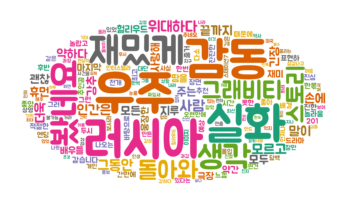

In [195]:
import pymysql
from krwordrank.hangle import normalize
from krwordrank.word import KRWordRank
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from palettable.colorbrewer.qualitative import Dark2_8
import random
from wordcloud import WordCloud

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

icon = Image.open("C:/mypython/cloud2.png")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
font_path = "C:/mypython/BMJUA_ttf.ttf"

exclude_set = {'영화', '평점' '많은', '많이', '너무', '정말', '진짜', '그리고', '가장', '제일', '이런', '하는', '엄청',\
               '조금', '완전', '계속', '할때', '있어', '있는', '있었던', '어떤', '이런', '않고', '보다', '그래도', '봤는데',\
               '보는', '어느', '하고', '하지만', '이렇게', '있다', '있어서', '이렇게', '봤습니다', '봤음', '이게', '아니라',\
              '대한', '한다', '하지', '동안', '것이', '보고', '있고', '얼마나', '봐도', '이거', '그냥', '것을', '특히', '이거',\
              '재밌', '좋은', '내가', '보면', '나를', '좋고', '아니', '지금', '무서', '봐야', '봤다', '봤으니', '봤다는데', \
              '합니다', '않은', '했던', '봤어요', '별점'}
# print(exclude_set)

### 모든 영화의 댓글 저장
comments_list = []

# 모든 댓글 영화id별로 database에서 호출
for idx in movie_id_list:
    db = pymysql.connect(host='localhost', port=3306, db='project_db', user='python', passwd='python', charset='utf8')
    query = 'select comment from movieapp_comment where movie_id={}'.format(idx)

    try:
        #select, update
        with db.cursor() as cursor:
            cursor.execute(query)
            result_list = cursor.fetchall() # cursor()의 값을 가져온다.
    finally:
        db.close()

    texts = [row[0] for row in result_list]
    # 영어, 한글, 숫자만
    texts = [normalize(text, english=True, number=True) for text in texts]
    comments_list.append(texts) 

    
### 단어 빈도수 keyword dict로 만들고 워드클라우드 생성 후 저장
for idx, texts in enumerate(comments_list): 
    wordrank_extractor = KRWordRank(
        min_count = 2, # 단어의 최소 출현 빈도수 (그래프 생성 시)
        max_length = 6, # 단어의 최대 길이
        verbose = True
        )

    beta = 0.85    # PageRank의 decaying factor beta
    max_iter = 6
    keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)
    keywords = dict(sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:min(len(keywords.keys()),610)])
    
#     for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
#         print('%8s:\t%.4f' % (word, r))

    # 필요없는 단어 삭제
    key_set = set(keywords.keys())
    for w in exclude_set & key_set:
        keywords.pop(w)

    wordcloud = WordCloud(
        font_path = font_path,
        width = 900,
        height = 300,
        background_color="white",
        mask = mask
    )

    wordcloud = wordcloud.generate_from_frequencies(keywords)
    wordcloud.recolor(color_func=color_func, random_state=1)

#     plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # plt.show()
    wordcloud.to_file("C:/mypython/recommend_movie/django_movie/movieapp/static/movieapp/img/wordcloud2/{}.png".format(movie_id_list[idx]))
    print('{}번 완료'.format(movie_id_list[idx]))

##### 참고
- [https://lovit.github.io/nlp/2018/04/17/word_cloud/]
- [https://noanswercode.tistory.com/8]